In [1]:
#modwt code from https://github.com/pistonly/modwtpy
#An improved wavelet–ARIMA approach for forecasting metal prices
#file:///Users/andyliu/Downloads/Resources%20Policy%20Volume%2039%20issue%202014%20[doi%2010.1016_j.resourpol.2013.10.005]%20Kriechbaumer,%20Thomas%3B%20Angus,%20Andrew%3B%20Parsons,%20David%3B%20Rivas%20Casad%20--%20An%20improved%20wavelet%E2%80%93ARIMA%20approach%20for%20forecasting%20met.pdf#page=4&zoom=100,0,0

In [1]:
import pywt
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from modwt import modwt, modwtmra
from sklearn import preprocessing

In [2]:
df = pd.read_csv('/Users/andyliu/develop/andy/aapl_indicators_nosplit.csv')

In [3]:
data = df['close']

In [4]:
#df = pd.read_csv('/Users/andyliu/Downloads/aapl_2000-2020.csv')

In [5]:
#df1 = df.drop(['item_id', 'timestamp'], axis=1)
#data = df1.values[1000000:1001000]

In [6]:
train_n = data.shape[0]*4//5
train = np.array(data[:train_n])
test = np.array(data[train_n:])

In [7]:
#test = pywt.Wavelet('haar')
#test.dec_hi

In [8]:
wt = modwt(train, 'db2', 6)
c = modwtmra(wt, 'db2')

In [9]:
c[6]

array([53.35795366, 51.87474301, 50.39405869, ..., 57.78908748,
       56.31874482, 54.84067974])

In [10]:
detail_series = c[:5]
smooth_series = c[6]

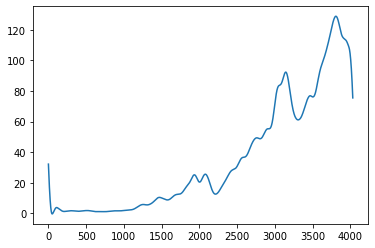

In [17]:
plt.plot(np.array(smooth_series[15:-15]))

In [49]:
reconstruction = np.array(smooth_series)
for i in detail_series:
    reconstruction += np.array(i)

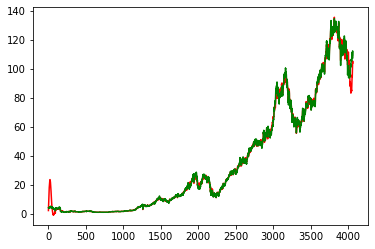

In [50]:
plt.plot(reconstruction, color='r')
plt.plot(train, color='g')

In [51]:
from pandas.plotting import autocorrelation_plot

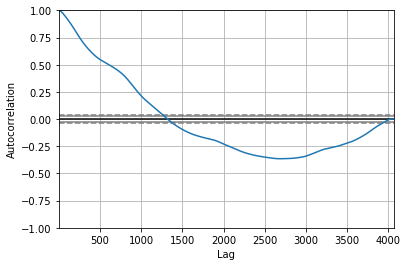

In [52]:
autocorrelation_plot(smooth_series)
plt.show()

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [54]:
from statsmodels.tsa.arima_model import ARIMA

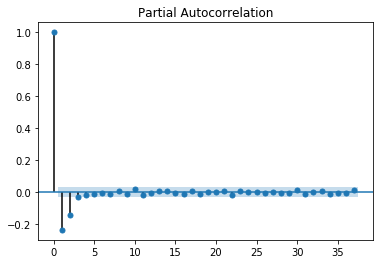

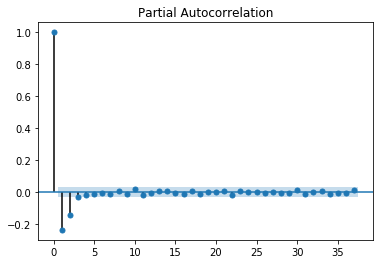

In [56]:
plot_pacf(detail_series[0])

In [68]:
model = ARIMA(smooth_series, order=(10,1,1))

In [69]:
model_fit = model.fit(disp=5)

//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [71]:
smooth_series

array([53.35795366, 51.87474301, 50.39405869, ..., 57.78908748,
       56.31874482, 54.84067974])

In [74]:
model_fit.predict()[0]

0.011785923880038851

In [77]:
l = []
for d in detail_series:
    print(d)
    modeld = ARIMA(d, order=(1,0,0))
    modelfit = modeld.fit(disp=5)
    l.append(modelfit)

[-25.6726375    3.27149688   3.29375    ...  -2.73647812  -3.3989875
  25.37685312]
[-13.57211885 -20.24916885  -5.52429541 ...   6.86368242  20.17702588
  12.01757529]
[ -7.01466889 -16.78608559 -20.31739024 ...  20.6077787   16.58746939
   6.43719208]
[ -3.51859047  -9.58025235 -14.47490509 ...  14.24224809   9.25556664
   3.13123147]
[-1.38100739 -4.70874704 -7.83830491 ...  8.48946147  5.36155402
  2.03430157]


In [56]:
model_fit.forecast()[0]

array([7.99314016])

In [78]:
prediction = model_fit.forecast()[0]
for i in l:
    prediction += i.forecast()[0]
print(prediction[0])

50.663059509034674


In [80]:
test[0]

106.68